# Bài 1.  

## a.  
Write a function that will generate and return a random sample of size
n from the two-parameter exponential distribution Exp(λ, η) for arbitrary n, λ, and η. (See Examples 2.3 and 2.6.) Generate a large sample
from Exp(λ, η) and compare the sample quantiles with the theoretical
quantiles.

In [1]:
# Function to generate random sample from two-parameter exponential distribution Exp(λ, η)
generate_exp_sample <- function(n, lambda, eta) {
  u <- runif(n)
  x <- -log(1 - u) / lambda
  y <- rexp(n, eta)
  return(list(x, y))
}

# Generate a large sample from Exp(λ, η)
n <- 1000  # Sample size
lambda <- 1  # Lambda parameter
eta <- 2  # Eta parameter

sample_data <- generate_exp_sample(n, lambda, eta)

# Compare sample quantiles with theoretical quantiles
sample_quantiles <- quantile(sample_data[[1]], probs = seq(0, 1, 0.1))
theoretical_quantiles <- qexp(seq(0, 1, 0.1), rate = lambda)

print("Sample quantiles:")
print(sample_quantiles)
print("Theoretical quantiles:")
print(theoretical_quantiles)

[1] "Sample quantiles:"
        0%        10%        20%        30%        40%        50%        60% 
0.00127966 0.11140375 0.23192130 0.36746406 0.51910253 0.70332450 0.92505357 
       70%        80%        90%       100% 
1.21725470 1.61289497 2.45626506 7.42477213 
[1] "Theoretical quantiles:"
 [1] 0.0000000 0.1053605 0.2231436 0.3566749 0.5108256 0.6931472 0.9162907
 [8] 1.2039728 1.6094379 2.3025851       Inf


Trong đoạn mã trên:  
  
    Hàm generate_exp_sample được sử dụng để tạo ra một mẫu ngẫu nhiên từ phân phối mũ hai tham số Exp(λ, η). Nó sử dụng hàm runif để tạo ra các số ngẫu nhiên từ phân phối đồng nhất trên đoạn [0,1], sau đó áp dụng phép biến đổi để thu được các giá trị từ phân phối mũ.  
    Một lượng lớn mẫu được tạo ra với kích thước n.  
    Các phân vị mẫu được tính bằng hàm quantile, trong khi các phân vị lý thuyết được tính bằng hàm qexp.  
    Kết quả là so sánh giữa các phân vị mẫu và các phân vị lý thuyết.  

## b.  
Vẽ hàm histogram của phân phối vừa sinh ra so với hàm thực tế 

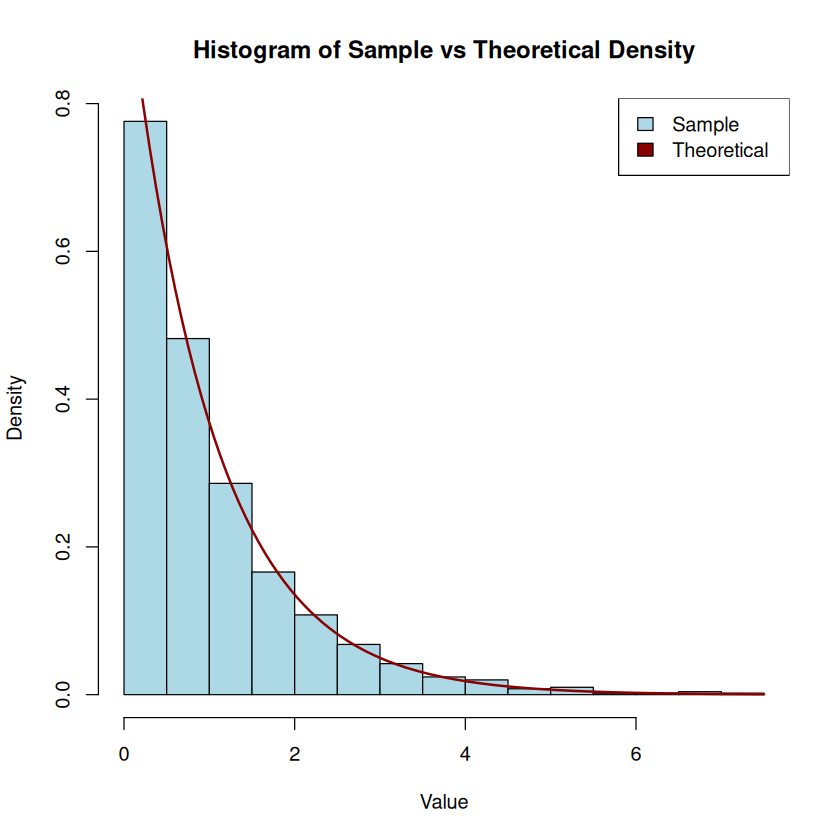

In [2]:
# Plot histogram of sample and overlay with theoretical density
hist(sample_data[[1]], freq = FALSE, col = "lightblue", main = "Histogram of Sample vs Theoretical Density", xlab = "Value")
curve(dexp(x, rate = lambda), col = "darkred", add = TRUE, lwd = 2, yaxt = "n")
legend("topright", legend = c("Sample", "Theoretical"), fill = c("lightblue", "darkred"))

Trong đó:  
Histogram của mẫu được vẽ sử dụng hàm hist, với màu nền "lightblue".  
Hàm mật độ xác suất thực tế của phân phối mũ được vẽ sử dụng hàm curve, với màu "darkred".  
Bảng chú giải được thêm vào biểu đồ để hiển thị màu sắc tương ứng của mẫu và hàm thực tế.  

# Bài 2.  
The standard Laplace distribution has density f (x) = 12 e−|x| , x ∈ R.
Use the inverse transform method to generate a random sample of size
1000 from this distribution. Use one of the methods shown in this chap-
ter to compare the generated sample to the target distribution.